# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA)

## 1. Genel Resim 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#pd.set_option("display.max_columns", None)
#pd.set_option("display.width", 500)  çıktıda "/"  ile gösterilip, alt satıra geçen değerleri enine doğru tek satırda yazdırır 

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
def check_df(dataframe, head = 5):
  print("########## HEAD############")
  print(dataframe.head())
  print("########## SHAPE ############")
  print(dataframe.shape)
  print("########## TYPES ############")
  print(dataframe.dtypes)
  print("########## INFO ############")
  print(dataframe.info())
  print("########## QUANTILES ############")
  print(dataframe.describe().T)
  print("########## NA ############")
  print(dataframe.isnull().sum())
  
check_df(df)



########## HEAD############
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
########## SHAPE ############
(891, 15)
########## TYPES ############
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
p

In [ ]:
df1 = sns.load_dataset("tips")
check_df(df1)

########## HEAD############
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
########## SHAPE ############
(244, 7)
########## TYPES ############
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
########## INFO ############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         24

# ANALYSIS of CATEGORICAL VARIABLES

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
print(df["sex"].unique())
print(df["sex"].nunique())

['male' 'female']
2


Kategorik tipteki değerleri yakalamaca :)

In [ ]:
cat_col = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_col

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
df["sex"].dtypes

dtype('O')

In [ ]:
str(df["sex"].dtypes)

'object'

In [ ]:
str(df["sex"].dtypes) in ["object"]

True

In [ ]:
str(df["alone"].dtypes) in ["bool"]

True

Nümerik gözüken ama kategorik değişken olanları bulma !

In [ ]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

Kategorik ama kardinal yani eşsiz çok fazla değere sahipleri yakalamaca :)

In [ ]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"] ]
cat_but_car

[]

In [ ]:
cat_col = cat_col + num_but_cat
cat_col

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [ ]:
cat_col = [col for col in cat_col if col not in cat_but_car]
cat_col 

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [ ]:
df[cat_col]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [ ]:
df[cat_col].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [ ]:
[col for col in df.columns if col not in cat_col]

['age', 'fare']

In [ ]:
100 * df["survived"].value_counts() / len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [ ]:
def cat_summary(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##############################")
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


In [ ]:
for col in cat_col:
  cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##############################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################
     alive      Ratio
no     549  61.616162
yes    342  38.383

        sex      Ratio
male    577  64.758698
female  314  35.241302
##################################################################


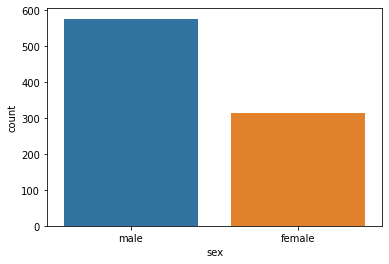

In [ ]:
def cat_summary(dataframe, col_name, plot = False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##################################################################")
  if plot:
    sns.countplot(x = dataframe[col_name], data = dataframe)
    plt.show(block = True)
cat_summary(df, "sex", plot = True);


        sex      Ratio
male    577  64.758698
female  314  35.241302
##################################################################


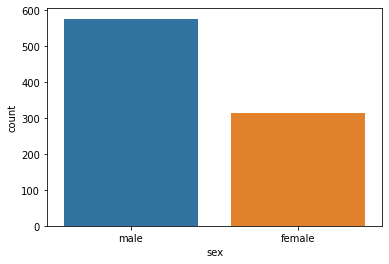

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##################################################################


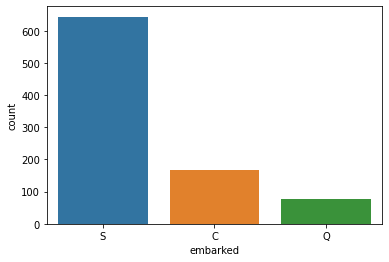

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##################################################################


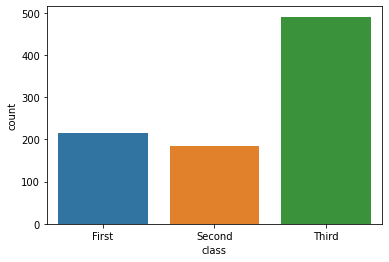

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##################################################################


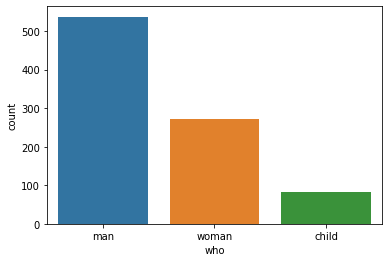

bu sütun bool tiptendir
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##################################################################


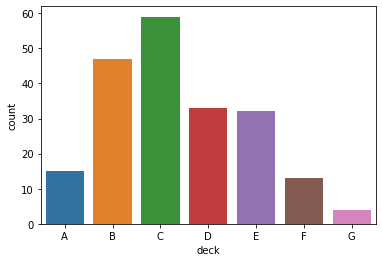

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##################################################################


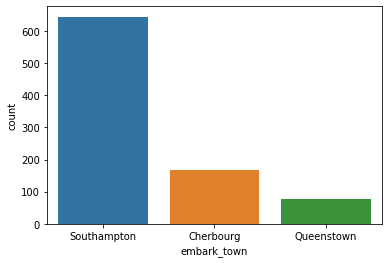

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##################################################################


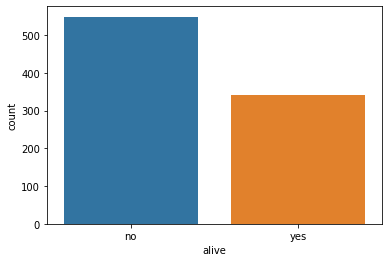

bu sütun bool tiptendir
   survived      Ratio
0       549  61.616162
1       342  38.383838
##################################################################


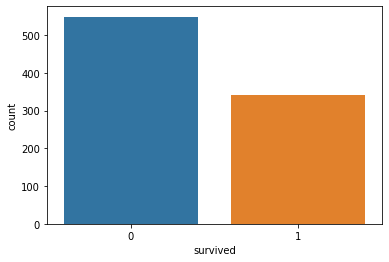

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##################################################################


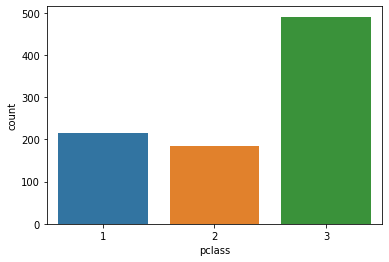

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##################################################################


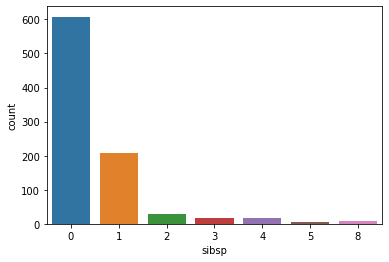

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##################################################################


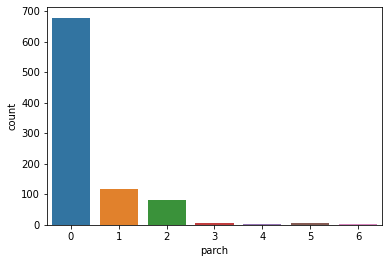

In [ ]:
for col in cat_col:
  if df[col].dtypes =="bool":
    print("bu sütun bool tiptendir")
  else:
    cat_summary(df, col, plot = True)

Bool tipte olanı kullanılabilir formata dönüştürme :


In [ ]:
df["adult_male"]

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [ ]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

        sex      Ratio
male    577  64.758698
female  314  35.241302
##################################################################


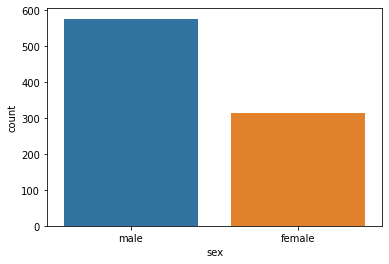

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##################################################################


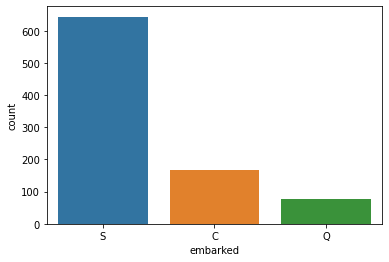

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##################################################################


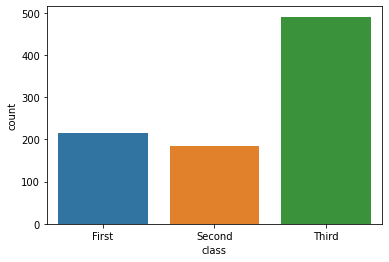

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##################################################################


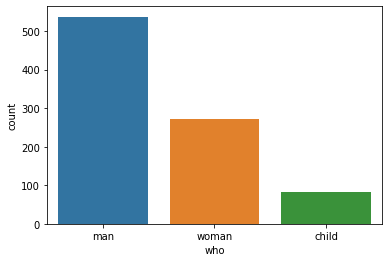

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##################################################################


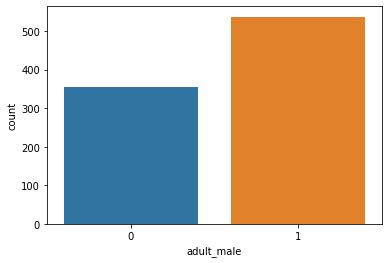

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##################################################################


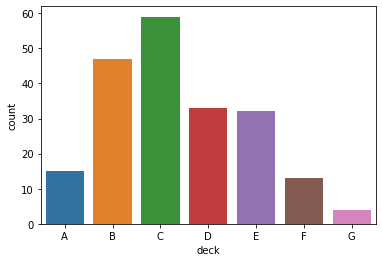

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##################################################################


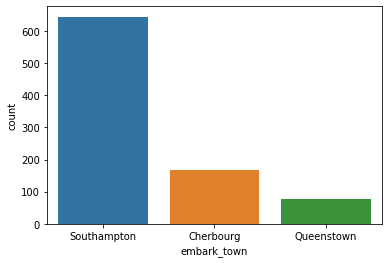

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##################################################################


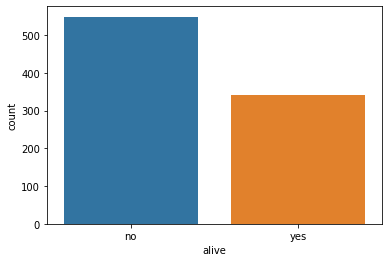

   alone     Ratio
1    537  60.26936
0    354  39.73064
##################################################################


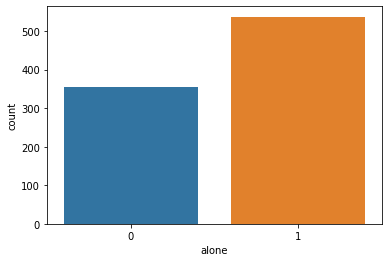

   survived      Ratio
0       549  61.616162
1       342  38.383838
##################################################################


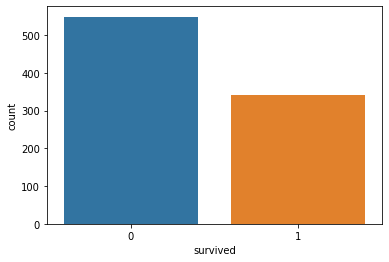

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##################################################################


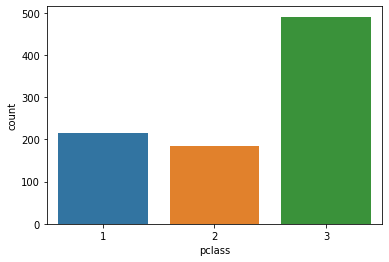

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##################################################################


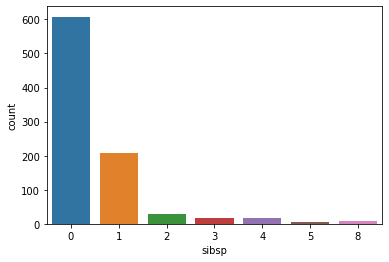

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##################################################################


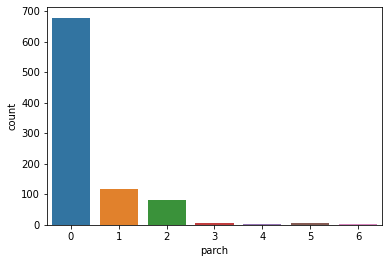

In [ ]:
# peki büyük ölçekli veri içinde bool olan değişkeni nasıl görselleştirirsin ?

for col in cat_col:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)
    cat_summary(df, col, plot = True)
  else:
    cat_summary(df, col, plot = True) 

### DAHA KARMAŞIK KOD İSTEYENLERE :) 

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##################################################################


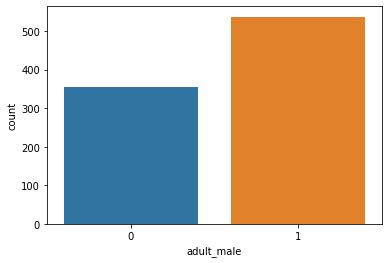

In [ ]:
def cat_summary(dataframe, col_name, plot = False):
  if dataframe[col_name].dtypes == "bool":

    dataframe[col_name] = dataframe[col_name].astype(int)

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    print("##################################################################")
    
    if plot:
      sns.countplot(x = dataframe[col_name], data = dataframe)
      plt.show(block = True)
 
  else:    
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
   
    print("##################################################################")
    
    if plot:
      sns.countplot(x = dataframe[col_name], data = dataframe)
      plt.show(block = True)

cat_summary(df, "adult_male", plot = True);


# SAYISAL DEĞİŞKEN ANALİZİ (ANALYSIS of NUMERICAL VARIABLES)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df[["age","fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
num_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [ ]:
num_cols = [col for col in num_cols if col not in cat_col]
num_cols

['age', 'fare']

In [ ]:
def num_summary(dataframe, numerical_col):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
num_summary(df, num_cols)


      count       mean        std   min     5%    10%      20%    30%   40%  \
age   714.0  29.699118  14.526497  0.42  4.000  14.00  19.0000  22.00  25.0   
fare  891.0  32.204208  49.693429  0.00  7.225   7.55   7.8542   8.05  10.5   

          50%      60%   70%      80%      90%        95%        99%       max  
age   28.0000  31.8000  36.0  41.0000  50.0000   56.00000   65.87000   80.0000  
fare  14.4542  21.6792  27.0  39.6875  77.9583  112.07915  249.00622  512.3292  


In [ ]:
# ikinci yol 
for col in num_cols:
  num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


      count       mean        std   min     5%    10%      20%    30%   40%  \
age   714.0  29.699118  14.526497  0.42  4.000  14.00  19.0000  22.00  25.0   
fare  891.0  32.204208  49.693429  0.00  7.225   7.55   7.8542   8.05  10.5   

          50%      60%   70%      80%      90%        95%        99%       max  
age   28.0000  31.8000  36.0  41.0000  50.0000   56.00000   65.87000   80.0000  
fare  14.4542  21.6792  27.0  39.6875  77.9583  112.07915  249.00622  512.3292  


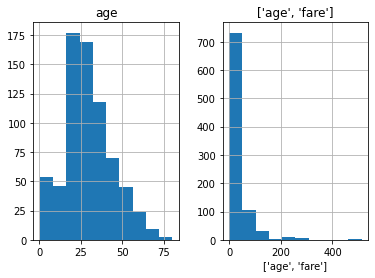

In [ ]:
def num_summary(dataframe, numerical_col, plot = False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()
num_summary(df, num_cols, plot = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


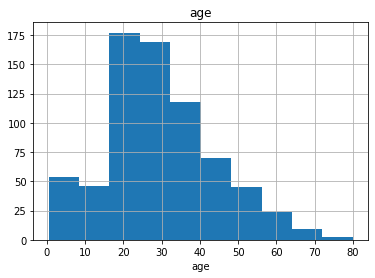

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


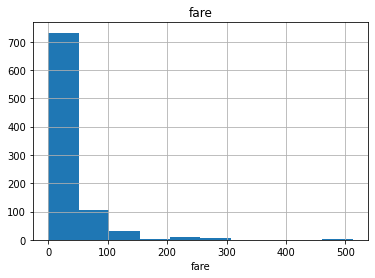

In [ ]:
for col in num_cols:
  num_summary(df, col, plot=True)

# DEĞİŞKENLERİN YAKALANMASI VE İŞLEMLERİN GENELLEŞTİRİLMESİ 

# CAPTURING VARIABLES AND GENERALIZING OPERATIONS (ÖNEMLİ)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


kategorik ve nümerik değişkenleri getir ek olarak kat_but_cardinalleri de getir

In [ ]:
#cat_th = 10 eşsiz değer sayısı 10 dan küçükse bu kategorik değişkendir diyeceğiz.

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  """
----------------------------
  Veri seti içerisindeki kategorik, nümerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
  Parametreler #docstring
---------------------------
  dataframe : dataframe
     değişken isimleri istenen dataframedir

  cat_th : int, float
     nümerik fakat kategorik olan değişkenler için sınıf eşik değeri

  car_th : int, float
    kategorik fakat kardinal değişkenler için sınıf eşik değeri

  Returns
  ------------------------

  cat_cols : list 
    kategorik değişken listesi

  num_cols : list
    nümerik değişken listesi

  cat_but_car : list
    kategorik görünümlü kardinal değişken listesi

 Notes:
-----------------------------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı

    num_but_cat cat_cols'un içindedir.

  """

                  

In [ ]:
help(grab_col_names)

Help on function grab_col_names in module __main__:

grab_col_names(dataframe, cat_th=10, car_th=20)
    ----------------------------
      Veri seti içerisindeki kategorik, nümerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
      Parametreler #docstring
    ---------------------------
      dataframe : dataframe
         değişken isimleri istenen dataframedir
    
      cat_th : int, float
         nümerik fakat kategorik olan değişkenler için sınıf eşik değeri
    
      car_th : int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri
    
      Returns
      ------------------------
    
      cat_cols : list 
        kategorik değişken listesi
    
      num_cols : list
        nümerik değişken listesi
    
      cat_but_car : list
        kategorik görünümlü kardinal değişken listesi
    
     Notes:
    -----------------------------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    
        num_but_cat cat_cols'un içind

In [ ]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):

  cat_col = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"] ]

  cat_col = cat_col + num_but_cat
  cat_cols = [col for col in cat_col if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observation : {dataframe.shape[0]}") #shape 0 da satır sayısı
  print(f"Variables : {dataframe.shape[1]}") # shape 1 de değişken sayısı
  print(f"cat_cols : {len(cat_cols)}")
  print(f"num_cols : {len(num_cols)}")
  print(f"cat_but_car : {len(cat_but_car)}")
  print(f"num_but_cat : {len(num_but_cat)}") 
  
  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observation : 891
Variables : 15
cat_cols : 13
num_cols : 2
cat_but_car : 0
num_but_cat : 4


In [ ]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [ ]:
num_cols

['age', 'fare']

In [ ]:
cat_but_car

[]

In [ ]:
def cat_summary(dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##############################")
for col in cat_cols:
  cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##############################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################
     alive      Ratio
no     549  61.616162
yes    342  38.383

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


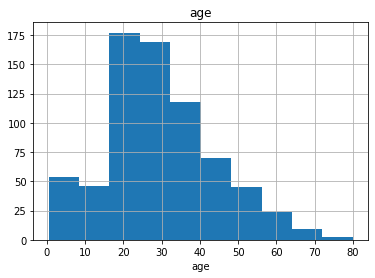

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


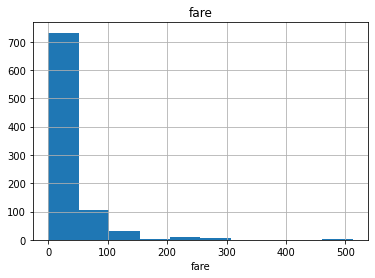

In [ ]:
def num_summary(dataframe, numerical_col, plot = False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

for col in num_cols:
  num_summary(df, col, plot = True)

## BONUS 
Bool değişkenleri bul int çevir.

AMAÇ : cat_summary fonksiyonunu daha etkili kullanmaya çalışmak.

In [ ]:
df = sns.load_dataset("titanic")
print(df.info()) #bool lu
for col in df.columns:
  if df[col].dtype == "bool":
    df[col] = df[col].astype(int)
print(df.info()) # bool suz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Da

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observation : 891
Variables : 15
cat_cols : 13
num_cols : 2
cat_but_car : 0
num_but_cat : 6


In [ ]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'adult_male',
 'alone']

In [ ]:
num_cols

['age', 'fare']

In [ ]:
cat_but_car

[]

        sex      Ratio
male    577  64.758698
female  314  35.241302
##################################################################


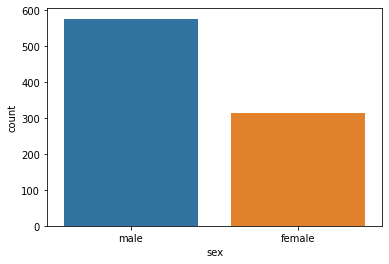

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##################################################################


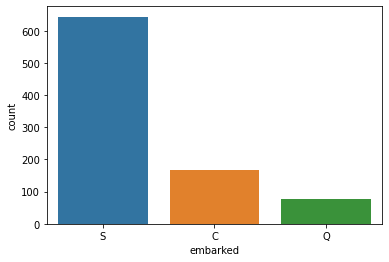

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##################################################################


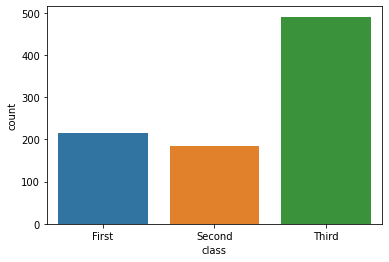

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##################################################################


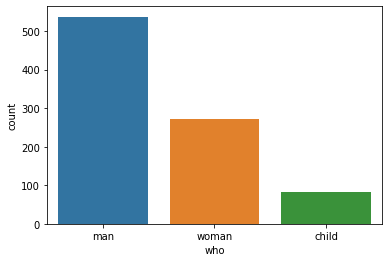

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##################################################################


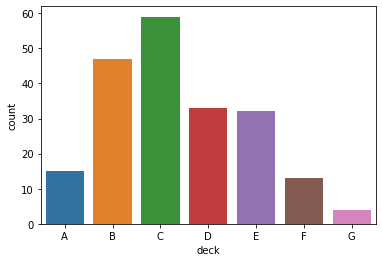

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##################################################################


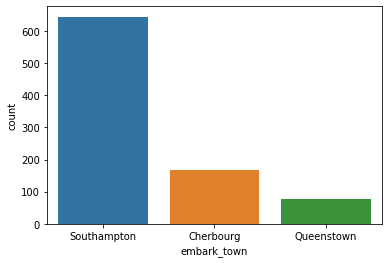

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##################################################################


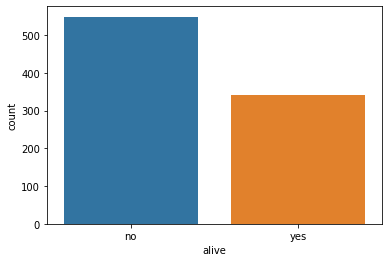

   survived      Ratio
0       549  61.616162
1       342  38.383838
##################################################################


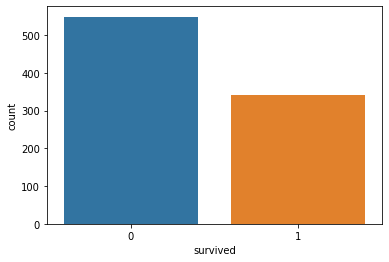

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##################################################################


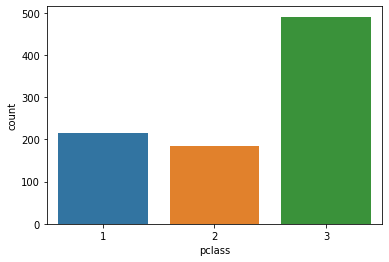

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##################################################################


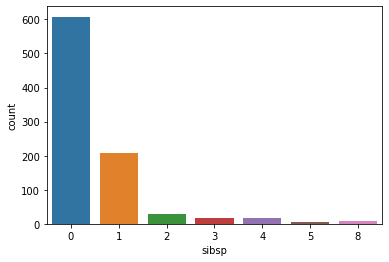

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##################################################################


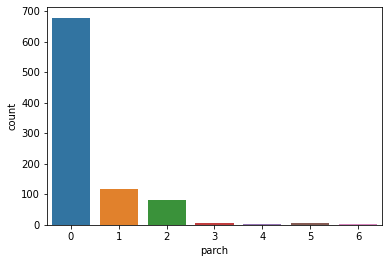

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##################################################################


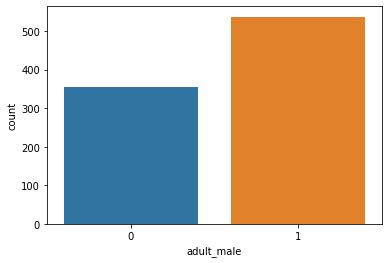

   alone     Ratio
1    537  60.26936
0    354  39.73064
##################################################################


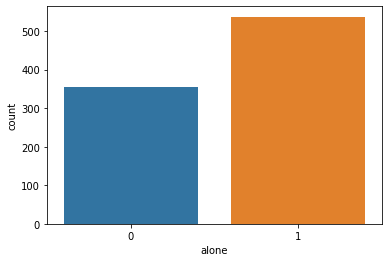

In [ ]:
def cat_summary(dataframe, col_name, plot = False):
  if dataframe[col_name].dtypes == "bool":

    dataframe[col_name] = dataframe[col_name].astype(int)

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    print("##################################################################")
    
    if plot:
      sns.countplot(x = dataframe[col_name], data = dataframe)
      plt.show(block = True)
 
  else:    
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
   
    print("##################################################################")
    
    if plot:
      sns.countplot(x = dataframe[col_name], data = dataframe)
      plt.show(block = True)
for col in cat_cols:
  cat_summary(df, col, plot = True);

# HEDEF DEĞİŞKEN ANALİZİ (ANALYSIS of TARGET VARIABLES)

## Kategorik Değişkenlerle:

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.groupby("sex")["survived"].mean()

#Hayatta kalmak için, kadın olmak direk etki eden bir faktör olabilir.

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
# Genelleştirirsek :

def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"Target_mean": dataframe.groupby(categorical_col)[target].mean()}), end = "\n\n\n")

target_summary_with_cat(df, "survived", "embarked")

          Target_mean
embarked             
C            0.553571
Q            0.389610
S            0.336957




In [ ]:
for col in cat_cols:
  target_summary_with_cat(df, "survived", col)

        Target_mean
sex                
female     0.742038
male       0.188908


          Target_mean
embarked             
C            0.553571
Q            0.389610
S            0.336957


        Target_mean
class              
First      0.629630
Second     0.472826
Third      0.242363


       Target_mean
who               
child     0.590361
man       0.163873
woman     0.756458


      Target_mean
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             Target_mean
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       Target_mean
alive             
no             0.0
yes            1.0


          Target_mean
survived             
0                 0.0
1                 1.0


        Target_mean
pclass             
1          0.629630
2          0.472826
3          0.242363


       Target_mean
sibsp             
0       

## Sayısal Değişkenlerle:

In [ ]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [ ]:
df.groupby("survived").agg({"age":"mean"})

,age
survived,
0,30.626179
1,28.343690


In [ ]:
# Genelleştirirsek :

def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col:"mean"}), end = "\n\n\n")

target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690




In [ ]:
for col in num_cols:
  target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




# KORELASYON ANALİZİ (ANALYSIS of CORRELATION)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cancer = pd.read_csv('/content/gdrive/My Drive/breast_cancer.csv')
df = cancer.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.iloc[:, 1:-1]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### yüksek korelasyonlu değerleri bulma

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype in ["int", "float"]]

corr = df[num_cols].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


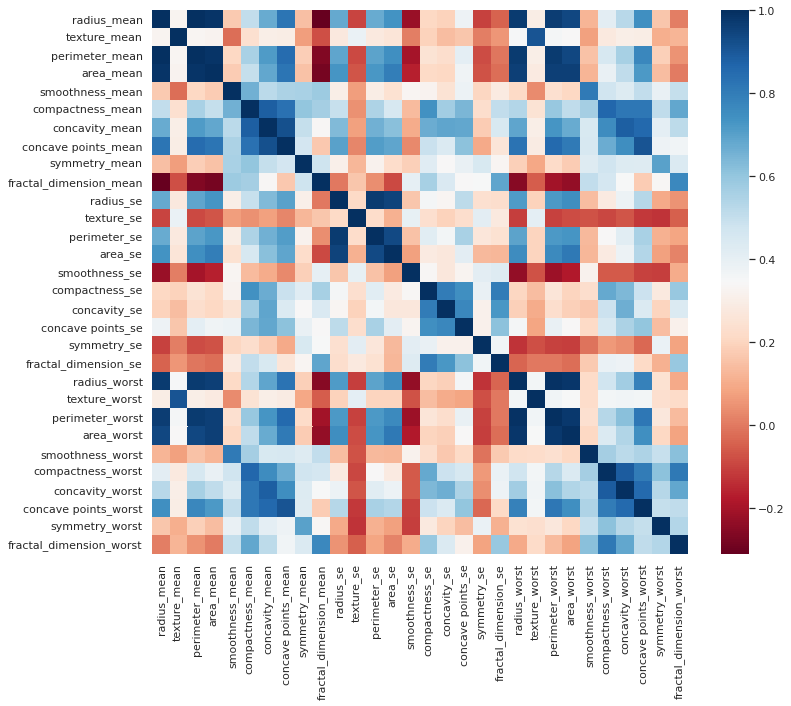

In [ ]:
sns.set(rc={"figure.figsize": (12, 10)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

# Yüksek Korelasyonlu Değişkenlerin Silinmesi

In [ ]:
cor_matrix = df.corr().abs()

In [ ]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
upper_triangle_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


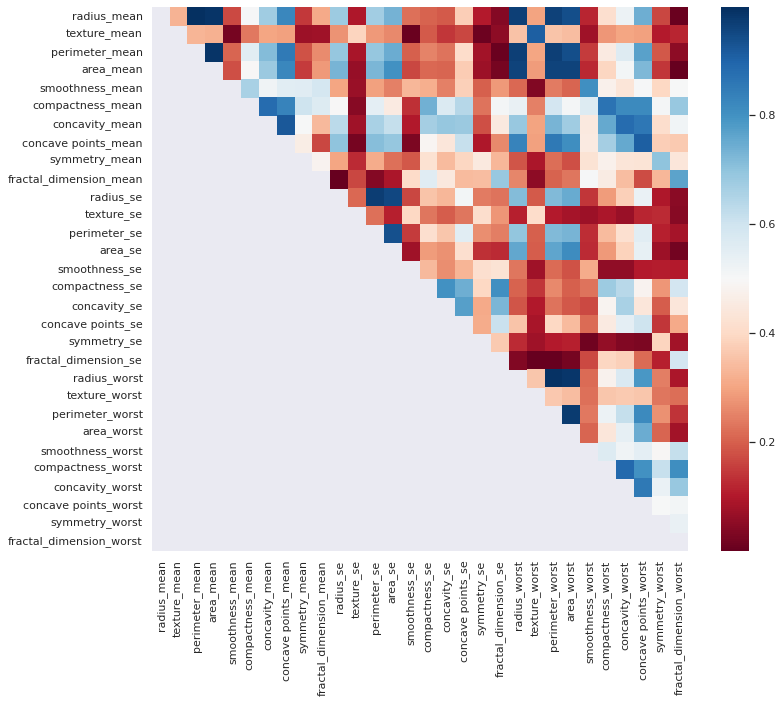

In [ ]:
sns.set(rc={"figure.figsize": (12, 10)})
sns.heatmap(upper_triangle_matrix, cmap="RdBu")
plt.show()

In [ ]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
drop_list

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [ ]:
cor_matrix[drop_list]
df.drop(drop_list, axis = 1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [ ]:
df.shape

#31 değişken vardı 10 tanesi yüksek korelasyondan dolayı silindi ve geriye 21 değişken kaldı.

(569, 31)

Yukarıda yapılan işlemleri fonksiyonlaştıralım. 

Dikkat ! Aşağıdaki kodu her zaman uygulamana gerek yok, yüksek korelasyona sahip olanları görmek istediğinde uygulayabilirsin. 

In [ ]:
def high_correlated_cols(dataframe, plot = False, corr_th = 0.90):
  corr = dataframe.corr()
  cor_matrix = corr.abs()
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90)]
  if plot:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(rc={"figure.figsize": (14, 10)})
    sns.heatmap(corr, cmap = "RdBu")
    plt.show()
  return drop_list  

high_correlated_cols(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [ ]:
drop_list = high_correlated_cols(df)
drop_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


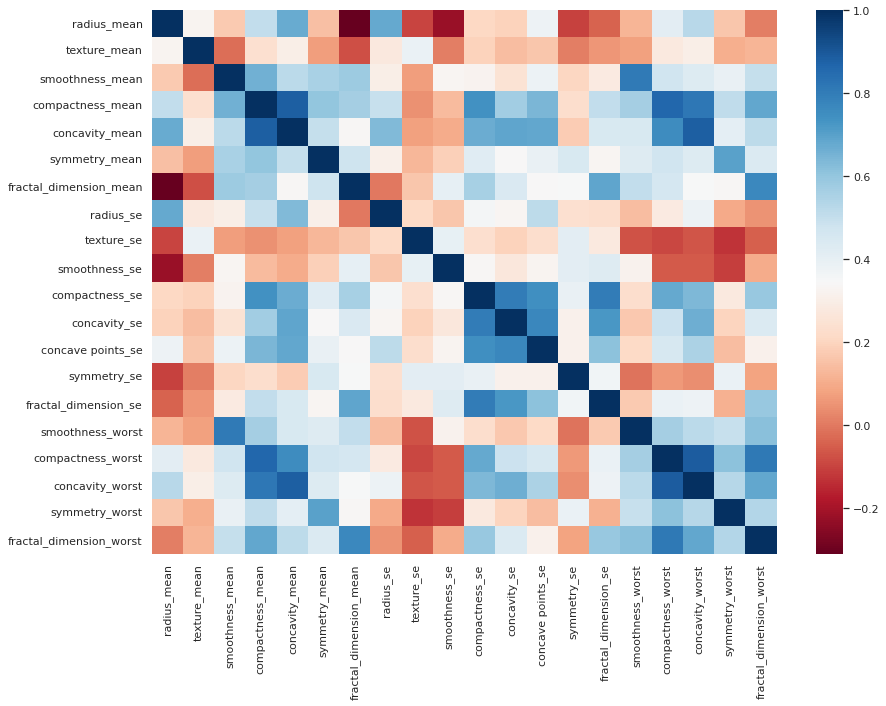

[]

In [ ]:
high_correlated_cols(df.drop(drop_list, axis=1), plot = True)